In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
iris = load_iris()
print(iris.feature_names)
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_Y = pd.get_dummies(iris_y).values
iris_X.shape, iris_Y.shape

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


((149, 4), (149, 3))

In [3]:
train_X, test_X, train_Y, test_Y = train_test_split(iris_X, iris_Y, test_size=0.33, random_state=42)
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((99, 4), (99, 3), (50, 4), (50, 3))

In [4]:
numFeatures = train_X.shape[1]
num_Labels = train_Y.shape[1]
X = tf.placeholder(tf.float32, [None, numFeatures])
Y_true = tf.placeholder(tf.float32, [None, num_Labels])

In [5]:
weights = tf.Variable(tf.random_normal([numFeatures, num_Labels], mean=0.0, stddev=0.01), name='weights')
biases = tf.Variable(tf.random_normal([num_Labels], mean=0.0, stddev=0.01), name='biases')

In [6]:
dense_1 = tf.add(tf.matmul(X, weights), biases)
activation_1 = tf.sigmoid(dense_1)
learning_rate = tf.train.exponential_decay(learning_rate=0.0008, 
                                          global_step=1,
                                          decay_steps=train_X.shape[0],
                                          decay_rate=0.95,
                                          staircase=True)
loss = tf.nn.l2_loss(activation_1 - Y_true, name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
init = tf.global_variables_initializer()
correct_prediction = tf.equal(tf.argmax(activation_1, axis=1), tf.argmax(Y_true, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [7]:
epochs = 1000
acc_arr = []
loss_arr = []
steps_arr = []
with tf.Session() as sess:
    sess.run(init)
    feed_dict = {X:train_X, Y_true:train_Y}
    for i in range(epochs):
        
        _, ls, acc = sess.run([optimizer, loss, accuracy], feed_dict=feed_dict)
        
        if i % 10 == 0:
            loss_arr.append(ls)
            acc_arr.append(acc)
            steps_arr.append(i)
            
    loss_arr = loss_arr / loss_arr[np.argmax(loss_arr)]
    feed_dict = {X: test_X, Y_true:test_Y}
    test_acc = sess.run(accuracy, feed_dict=feed_dict)
    print('Test Accuracy : {}'.format(test_acc))
    feed_dict = {X: train_X, Y_true:train_Y}
    train_acc = sess.run(accuracy, feed_dict=feed_dict)
    print('\nTrain Accuracy : {}'.format(train_acc))

Test Accuracy : 1.0

Train Accuracy : 0.939393937587738


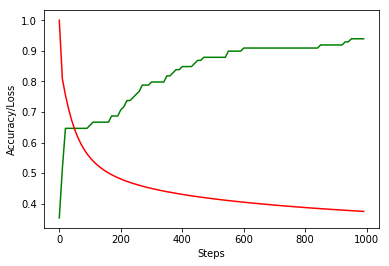

In [8]:
plt.plot(steps_arr,acc_arr, 'g')
plt.plot(steps_arr, loss_arr, 'r')
plt.xlabel('Steps')
plt.ylabel('Accuracy/Loss')
plt.show()

In [9]:
iris_Xp = np.reshape(np.array([iris_X[:, 1], iris_X[:, 3]]), (149, 2))
iris_Yp = iris_y
iris_Xp_centosa = np.array([iris_Xp[d, :] for d in range(iris_Yp.shape[0]) if iris_Yp[d] == 0])
iris_Xp_virginica = np.array([iris_Xp[d, :] for d in range(iris_Yp.shape[0]) if iris_Yp[d] == 1])
iris_Xp_versicolor = np.array([iris_Xp[d, :] for d in range(iris_Yp.shape[0]) if iris_Yp[d] == 2])
iris_Xp_centosa.shape, iris_Xp_virginica.shape, iris_Xp_versicolor.shape

((50, 2), (50, 2), (49, 2))

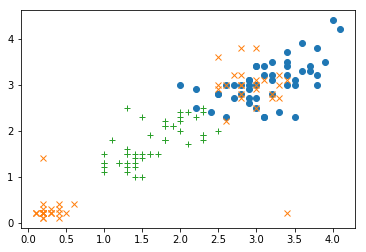

In [10]:
plt.plot(iris_Xp_centosa[:, 0], iris_Xp_centosa[:, 1], 'o')
plt.plot(iris_Xp_virginica[:, 0], iris_Xp_virginica[:, 1], 'x')
plt.plot(iris_Xp_versicolor[:, 0], iris_Xp_versicolor[:, 1], '+')
plt.show()